# Notebook 19: Small Sample Tests for Mean and Variance of Normal Populations
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - The Sampling Distribution for the Variance of a Normal Population 
*** 

We saw some time ago that the sample mean of a normal population itself has a normal distribution.  In this exercise we'll explore the $\color{red}{\text{sampling distribution of the sample variance from a normal population.}}$  

**Part A**: The following function draws many samples of size $n$ from $N(\mu, \sigma^2)$ and plots a $\color{blue}{\text{histogram of the resulting sample means.}}$  Run the code a few times and verify that the sampling distribution does appear normal, $\color{red}{\text{even for small sample sizes.}}$

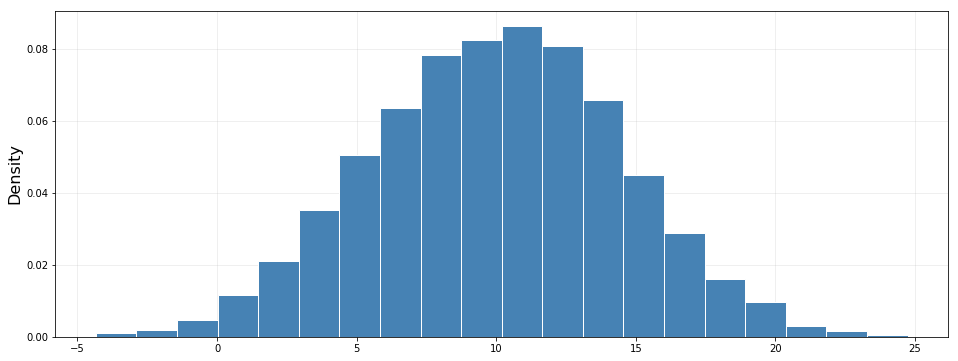

In [2]:
# This function will plot a histogram of num_tests=5000 means from
#  samples of size 10, randomly chosen from a normal distribution.
def sampling_dist(num_tests=5000, sample_size=10, mu=5, sig=2): 
    
    # Initialize the graph.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    
    # 'xbars' is an array holding the num_tests=5000 random means. 
    xbars = np.array([np.mean(stats.norm.rvs(mu, sig, size=sample_size)) for ii in range(num_tests)])
    
    # Make a histogram out of 'xbars'.
    pd.Series(xbars).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)
    
    # Make the graph pretty
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
# Now call the function
sampling_dist(num_tests=5000, sample_size=5, mu=10, sig=10)
# This call of the function graphs a histogram of the means from the
#  num_tests=5000 samples of size 5 that were taken from
#  a normal with a mean of 10 and a std of 10.
#  error = std / sqrt{5}

**Part B**: Modify the code above so that it plots a histogram of the **sample variance** of samples from $N(\mu,\sigma^2)$.  Experiment with the parameters $\mu$, $\sigma$, and _in-particular_ the sample size (starting with values of $n \approx 5$). Describe the resulting distributions. 

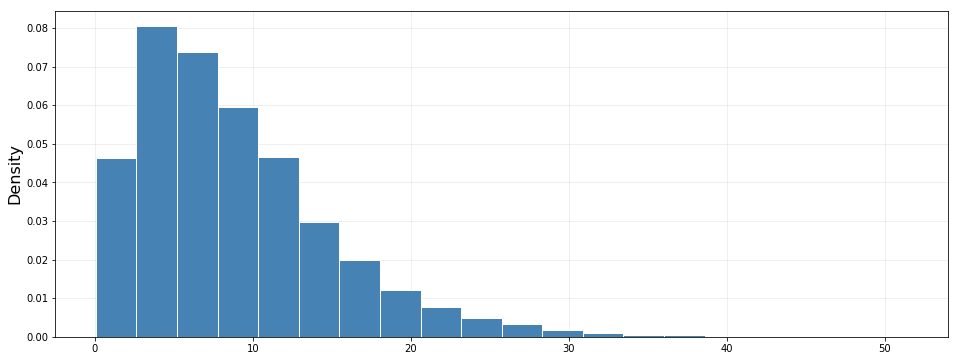

In [3]:
# This function creates a histogram of num_tests=5000 sample variances
#  from a normal with a desired mean and std.
def sampling_dist(num_tests=5000, sample_size=10, mu=5, sig=2): 
    
    # Initialize the plot.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    
    # 'xbars' is an array that contains num_tests=5000 amount of
    #  SAMPLE variances from a normal with desired mean and std.
    xbars = np.array([np.var(stats.norm.rvs(mu, sig, size=sample_size),ddof=1) for ii in range(num_tests)])
    
    # Make a histogram out of 'xbars'.
    pd.Series(xbars).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)
    
    # Make the graph pretty.
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
# Call the function for a normal with mean=3 and std=3.
sampling_dist(num_tests=5000, sample_size=5, mu=3, sig=3)
# Note that the shape is a Chi-square distribution because
#  we are sampling variance.

**Part C**: Modify the code above so that it simulates $(n-1)S^2/\sigma^2$ (random variable associated with Chi squared) creates the histogram, and then overlays the associated density function of the proper $\chi^2_\nu$ distribution (obtained from scipy.stats.chi2). 

**Hint**: If you're using np.var to compute the sample variance, know that it takes an optional argument ddof that determines the denominator that divides the sum of squared deviations.  Passing in ddof=1 will give the traditional sample variance. 

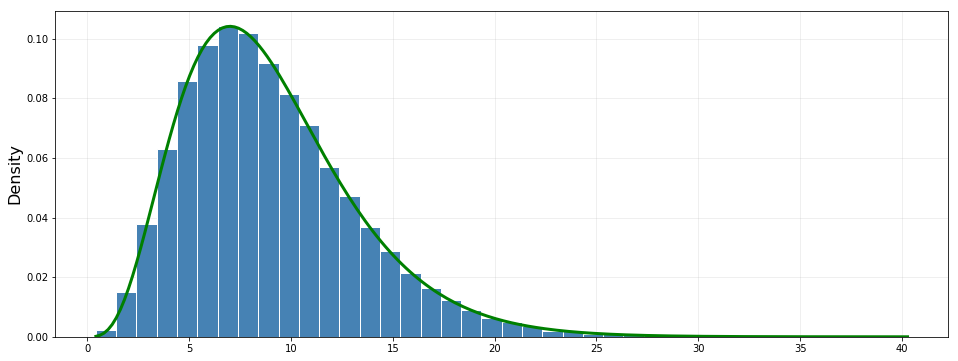

In [4]:
# This function graphs a histogram of sample random variables as well
#  as the density function of the chi2 distribution.
def sampling_dist(num_tests=5000, sample_size=10, mu=5, sig=2): 
    
    # Initialize the plot.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    
    # 'xbars' now contains num_tests=5000 random variables.
    xbars = np.array([(sample_size-1)*np.var(stats.norm.rvs(mu, sig, size=sample_size),ddof=1)/(sig*sig) for ii in range(num_tests)])
    
    # Make a histogram out of 'xbars'.
    pd.Series(xbars).hist(ax=ax, color="steelblue", edgecolor="white", bins=40, density=True)
    
    # Make the graph pretty.
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
    # 'xplot' is an array of 200 values, evenly spaced between
    #  the min and the max of 'xbars'.
    xplot = np.linspace(np.min(xbars), np.max(xbars), 200)
    
    # 'pdf' is the y-values of the chi2 pdf with 'xplot' as the
    #  x-value inputs; using the appropriate degrees of freedom.
    pdf = stats.chi2.pdf(xplot,sample_size-1)
    
    # Color 'pdf' green.
    ax.plot(xplot, pdf, color="green", lw=3)
    
# Call the function with desired parameters.
sampling_dist(num_tests=50000, sample_size=10, mu=3, sig=3)

### Exercise 2 - Small Sample vs Bootstrapped Confidence Intervals 
*** 

In this exercise you will $\color{red}{\text{compare the confidence intervals}}$ achieved using the small-sample techniques discussed in class and empirical bootstrapped confidence intervals.

For all tests we will use a random sample of size $n=10$ from the normal population distribution with parameters $\mu=5$ and $\sigma=2$.  

In [5]:
# mu, sig, n, alpha = 5, 2, 10, 0.05
mu = 5
sig = 2
n = 10
alpha = 0.05

# 'x' is an array holding size=n amount of random picks from N(mu,sig).
x = stats.norm.rvs(mu, sig, size=n)



**Part A**: Compute a 95% t-confidence interval for the population mean based on the sample mean.  

From class, we know that a t-confidence interval for the mean is:

$$\Bigg[\bar{x} \color{red}{-} t_{1-\alpha/2,n-1} \dfrac{s}{\sqrt{n}},\phantom{xxx} \bar{x} \color{red}{+} t_{1-\alpha/2,n-1} \dfrac{s}{\sqrt{n}}\Bigg]$$

In [6]:
# 'mean_t_CI' is the CI as calculated by hand.
mean_t_CI = [np.mean(x) + pm*stats.t.ppf(1-alpha/2, n-1)*np.std(x, ddof=1)/np.sqrt(n) for pm in [-1,1]]
print("t-CI for mean: [{:.3f}, {:.3f}]".format(mean_t_CI[0], mean_t_CI[1]))

L_tCI_mean = np.mean(x) - stats.t.ppf(1-alpha/2, n-1)*np.std(x, ddof=1)/np.sqrt(n)
U_tCI_mean = np.mean(x) + stats.t.ppf(1-alpha/2, n-1)*np.std(x, ddof=1)/np.sqrt(n)
print(L_tCI_mean, U_tCI_mean)

t-CI for mean: [4.441, 7.646]
4.441130377470296 7.646350086938977


**Part B**: Compute an empirical $\color{red}{\text{bootstrapped 95%}}$ confidence interval for the population mean.

Use the same sample used in **Part A**.  

How do the confidence intervals compare?  
Do they both cover the true mean of $\mu=5$?  
Are they approximately the same width? 

In [7]:
# We will collect num_boots=10000 amount of resamples
num_boots=10000

# 'boot_means' is an array containing the num_boots=10000 resamples.
boot_means = np.array([np.mean(np.random.choice(x, replace=True, size=n)) for ii in range(num_boots)])

# 'mean_b_CI' contains the bootstrap Lower and Upper desired values.
mean_b_CI = [np.percentile(boot_means, 100*alpha/2), np.percentile(boot_means, 100*(1-alpha/2))]

# Print out the CI.
print("b-CI for mean: [{:.3f}, {:.3f}]".format(mean_b_CI[0], mean_b_CI[1]))
print("")
print("Recall the known mean is 5.")


b-CI for mean: [4.759, 7.399]

Recall the known mean is 5.


Both the t-confidence interval and the bootstrapped confidence interval cover the true mean $\mu=5$.  The t-confidence interval is slightly wider than the bootstrapped confidence interval.

**Part C**: $\color{red}{\text{OPTIONAL}}$Compute a 95% confidence interval for the population variance based on the $\chi^2$ distribution using the same sample used in **Part A**. 

In [8]:
# 'x' is an array holding size=n amount of random picks from N(mu,sig).
# 'var_c_CI' holds the Upper and Lower CI values for variance as
#  calculated from 'x'.
var_c_CI = [(n-1)*np.var(x, ddof=1)/c for c in [stats.chi2.ppf(1-alpha/2, n-1), stats.chi2.ppf(alpha/2, n-1)]]
print("c-CI for var: [{:.3f}, {:.3f}]".format(var_c_CI[0], var_c_CI[1]))


c-CI for var: [2.375, 16.727]


**Part D**: Compute an empirical bootstrapped 95% confidence interval for the population variance using the same sample as in **Part A**.  How do the confidence intervals compare?  Do they both cover the true variance of $\sigma^2=4$?  Are they approximately the same width? 

In [9]:
# Via the bootstrap method, we will collect num_boots=10000 amount of resamples.
num_boots=10000

# 'boot_vars' is an array containing the num_boots-10000 amount of
#  variances from 'x'.
boot_vars = np.array([np.var(np.random.choice(x, replace=True, size=n), ddof=1) for ii in range(num_boots)])

# 'var_b_CI' contains the Lower and the Upper values of the CI.
var_b_CI = [np.percentile(boot_vars, 100*alpha/2), np.percentile(boot_vars, 100*(1-alpha/2))]

# Print out the CI
print("b-CI for var: [{:.3f}, {:.3f}]".format(var_b_CI[0], var_b_CI[1]))



b-CI for var: [1.453, 8.437]


Both the $\chi^2$-confidence interval and the bootstrapped confidence interval cover the true variance of $\sigma^2=4$.  The $\chi^2$-confidence interval is significantly wider than the bootstrapped confidence interval.  In general, for a sample size this small, the $\chi^2$-confidence interval has better coverage properties than the bootstrapped confidence interval. 

In [10]:
# Just a practice screen comparing degrees of freedom.
# As DF increases, t-values are pushed towards the mean,
#  that is to say, they decrease.

print(stats.t.ppf(.95, 9))
print(stats.t.ppf(.95, 10))
print(stats.t.ppf(.95, 11))
print(stats.t.ppf(.95, 15))

1.8331129326536335
1.8124611228107335
1.7958848187036691
1.7530503556925547
